# testgcfb_v211
- Compare output signals of GammachirPy (Python) to the original Gammachirp filterbank (Matlab)
- The output signals of the Gammachirp filterbank are saved as a mat-file (.mat).

In [47]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

import utils
import gcfb_v211 as dcgc

## Set default parameters for the Gammachirp filterbank (GCFB)

In [48]:
class GCparamDefault:
    fs = 48000 # sampling frequency
    NumCh = 100 # channels
    FRange = np.array([100, 6000]) # range of center frequencies
    OutMidCrct = "No"

## Make a simple pulse train as an input signal 

In [49]:
fs = 48000
t_pulse = 10 # (ms) 100 Hz pulse train
snd = np.array(([1]+[0]*int(t_pulse*fs/1000-1))*10)
t_snd = len(snd)/fs
print(f"Duration of sound = {t_snd*1000} (ms)")

Duration of sound = 100.0 (ms)


Text(0.5, 1.0, 'Input: pulse train')

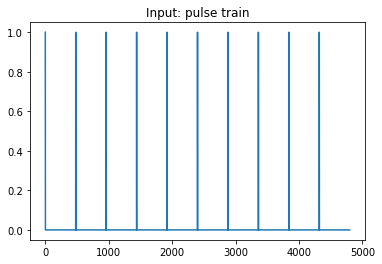

In [50]:
# Plot the input signal
fig, ax = plt.subplots()
ax.plot(snd)
ax.set_title("Input: pulse train")

## Input level: 40 dB SPL

In [51]:
dbspl = 40
gc_param_ctrl = 'dynamic'

In [52]:
# Level equalization
snd_eq, _ = utils.Eqlz2MeddisHCLevel(snd, dbspl)

# GCFB
gc_param = GCparamDefault() # reset all
gc_param.Ctrl = gc_param_ctrl
cgc_out, pgc_out, _, _ = dcgc.gcfb_v211(snd_eq, gc_param)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.4 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.7 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.8 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.8 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of ACFstatus
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 100.0 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 10.0 (ms) / 100.0 (ms). elapsed time = 2.5 (sec)
Dynamic Compressive-Gammachirp: Time 20.0 (ms) / 100.0 (ms). elapsed time = 3.7 (sec)
Dynamic Compressive-Gammachirp: Tim

In [53]:
# load original outputs
name_file = f"./original/GCFBv211_GCout_{gc_param.Ctrl}_{dbspl}dBSPL.mat"
gc_out_org = sio.loadmat(name_file)

In [54]:
# cGCout
cgc_out_org = gc_out_org['cGCout']
rmse = utils.rms(cgc_out_org - cgc_out)
print(f'RMSE (cGC): {rmse}')

RMSE (cGC): 4.1141334993690446e-14


In [55]:
# pGCout
pgc_out_org = gc_out_org['pGCout']
rmse = utils.rms(pgc_out_org - pgc_out)
print(f'RMSE (pGC): {rmse}')

RMSE (pGC): 1.0984229101280746e-14


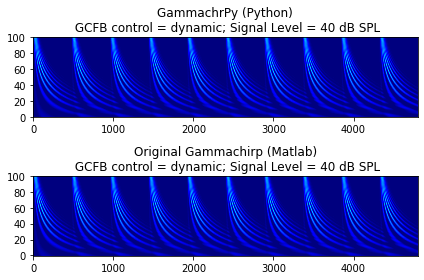

In [56]:
# GammachirPy (Python)
ax = plt.subplot(2, 1, 1)
plt.imshow(np.maximum(cgc_out, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"GammachirPy (Python)\n GCFB control = {gc_param.Ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

# Original Gammachirp (Matlab)
ax = plt.subplot(2, 1, 2)
plt.imshow(np.maximum(cgc_out_org, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"Original Gammachirp (Matlab)\n GCFB control = {gc_param.Ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()

## Input level: 60 dB SPL

In [57]:
dbspl = 60
gc_param_ctrl = 'dynamic'

In [58]:
# Level equalization
snd_eq, _ = utils.Eqlz2MeddisHCLevel(snd, dbspl)

# GCFB
gc_param = GCparamDefault() # reset all
gc_param.Ctrl = gc_param_ctrl
cgc_out, pgc_out, _, _ = dcgc.gcfb_v211(snd_eq, gc_param)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.4 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.5 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.7 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.9 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of ACFstatus
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 100.0 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 10.0 (ms) / 100.0 (ms). elapsed time = 2.3 (sec)
Dynamic Compressive-Gammachirp: Time 20.0 (ms) / 100.0 (ms). elapsed time = 4.7 (sec)
Dynamic Compressive-Gammachirp: Tim

In [59]:
# load original outputs
name_file = f"./original/GCFBv211_GCout_{gc_param.Ctrl}_{dbspl}dBSPL.mat"
gc_out_org = sio.loadmat(name_file)

In [60]:
# cGC_out
cgc_out_org = gc_out_org['cGCout']
rmse = utils.rms(cgc_out_org - cgc_out)
print(f'RMSE (cGC): {rmse}')

RMSE (cGC): 2.2682677583240407e-13


In [61]:
# pGCout
pgc_out_org = gc_out_org['pGCout']
rmse = utils.rms(pgc_out_org - pgc_out)
print(f'RMSE (pGC): {rmse}')

RMSE (pGC): 1.09844849984463e-13


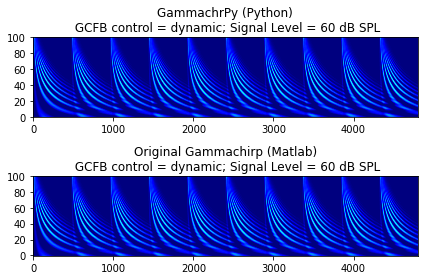

In [62]:
# GammachirPy (Python)
ax = plt.subplot(2, 1, 1)
plt.imshow(np.maximum(cgc_out, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"GammachirPy (Python)\n GCFB control = {gc_param.Ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

# Original Gammachirp (Matlab)
ax = plt.subplot(2, 1, 2)
plt.imshow(np.maximum(cgc_out_org, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"Original Gammachirp (Matlab)\n GCFB control = {gc_param.Ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()

## Input level: 80 dB SPL

In [63]:
dbspl = 80
gc_param_ctrl = 'dynamic'

In [64]:
# Level equalization
snd_eq, _ = utils.Eqlz2MeddisHCLevel(snd, dbspl)

# GCFB
gc_param = GCparamDefault() # reset all
gc_param.Ctrl = gc_param_ctrl
cgc_out, pgc_out, _, _ = dcgc.gcfb_v211(snd_eq, gc_param)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.5 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.6 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.7 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.9 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of ACFstatus
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 100.0 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 10.0 (ms) / 100.0 (ms). elapsed time = 3.0 (sec)
Dynamic Compressive-Gammachirp: Time 20.0 (ms) / 100.0 (ms). elapsed time = 5.7 (sec)
Dynamic Compressive-Gammachirp: Tim

In [65]:
# load original outputs
name_file = f"./original/GCFBv211_GCout_{gc_param.Ctrl}_{dbspl}dBSPL.mat"
gc_out_org = sio.loadmat(name_file)

In [66]:
# cGCout
cgc_out_org = gc_out_org['cGCout']
rmse = utils.rms(cgc_out_org - cgc_out)
print(f'RMSE (cGC): {rmse}')

RMSE (cGC): 1.7455400415295252e-12


In [67]:
# pGCout
pgc_out_org = gc_out_org['pGCout']
rmse = utils.rms(pgc_out_org - pgc_out)
print(f'RMSE (pGC): {rmse}')

RMSE (pGC): 1.0987470937777825e-12


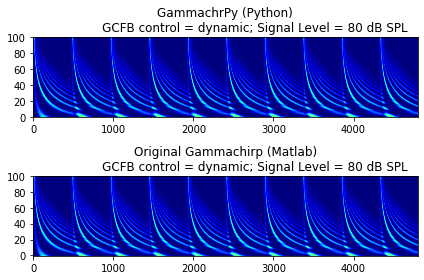

In [68]:
# GammachirPy (Python)
ax = plt.subplot(2, 1, 1)
plt.imshow(np.maximum(cgc_out, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"GammachirPy (Python)\n\
               GCFB control = {gc_param.Ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

# Original Gammachirp (Matlab)
ax = plt.subplot(2, 1, 2)
plt.imshow(np.maximum(cgc_out_org, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"Original Gammachirp (Matlab)\n\
               GCFB control = {gc_param.Ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()